# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [58]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


## Loading the dataset

In [59]:
# Loading the dataset
dataset_path = '../data/Loan_Modelling.csv'  
loan_data = pd.read_csv(dataset_path)

# Displaying the first few rows of the dataset to check its loading correctly
loan_data.head()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

* Observations
* Sanity checks

In [60]:
# Displaying the shape of the dataset
print("Dataset Shape:", loan_data.shape)

# Summary of the dataset
print("\nDataset Info:")
loan_data.info()

# Displaying the first few rows for a quick overview
print("\nFirst Few Rows:")
print(loan_data.head())

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(loan_data.describe())

# Checking for columns with a single unique value
print("\nColumns with a Single Unique Value:")
for col in loan_data.columns:
    if loan_data[col].nunique() == 1:
        print(col)

# Checking for negative values in columns where they don't make sense
negative_checks = ['Age', 'Experience']  # Add other columns if needed
for col in negative_checks:
    if any(loan_data[col] < 0):
        print(f"Negative values found in {col}")



Dataset Shape: (5000, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB

First Few Rows

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?


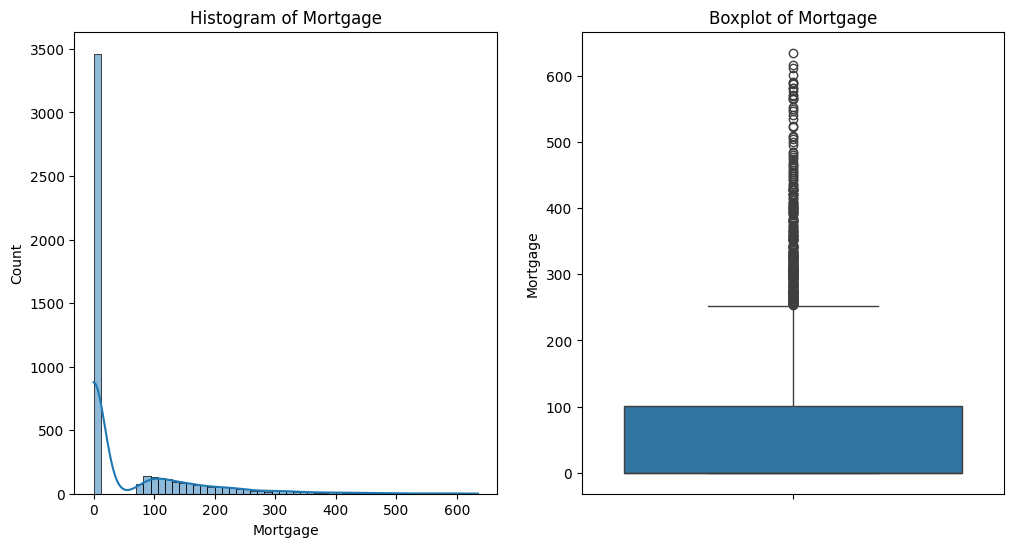

In [61]:
# 1. Distribution of the 'Mortgage' attribute
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(loan_data['Mortgage'], kde=True)
plt.title('Histogram of Mortgage')

plt.subplot(1, 2, 2)
sns.boxplot(y=loan_data['Mortgage'])
plt.title('Boxplot of Mortgage')
plt.show()


2. How many customers have credit cards?


In [62]:
# Number of customers with credit cards
num_credit_cards = loan_data['CreditCard'].sum()
print("Number of Customers with Credit Cards:", num_credit_cards)


Number of Customers with Credit Cards: 1470


3. What are the attributes that have a strong correlation with the target attribute (personal loan)?


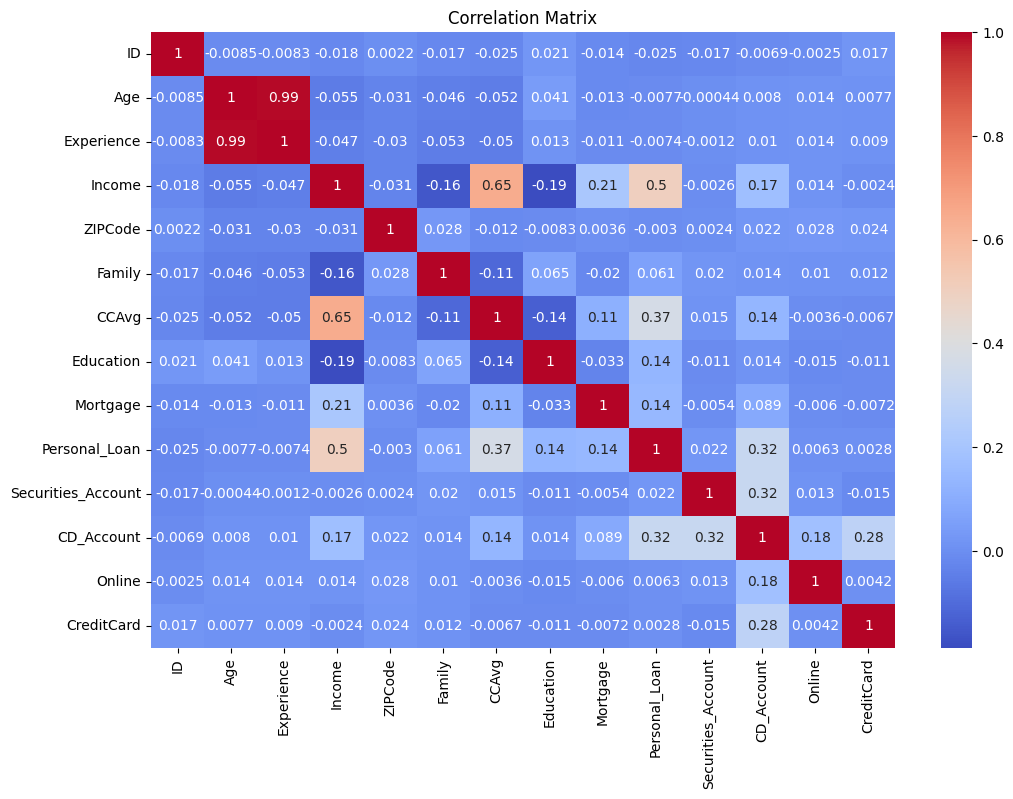

In [63]:
# Correlation with Personal Loan
correlation = loan_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


4. How does a customer's interest in purchasing a loan vary with their age?


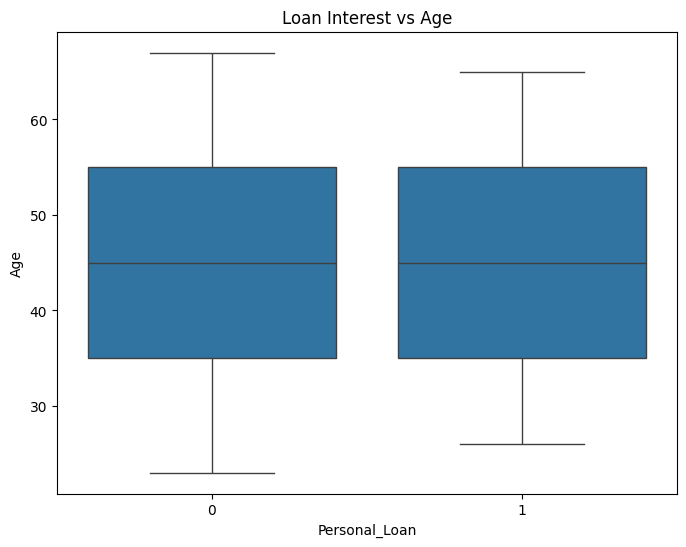

In [64]:
# Customer's interest in loan vs. Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=loan_data)
plt.title('Loan Interest vs Age')
plt.show()


5. How does a customer's interest in purchasing a loan vary with their education?

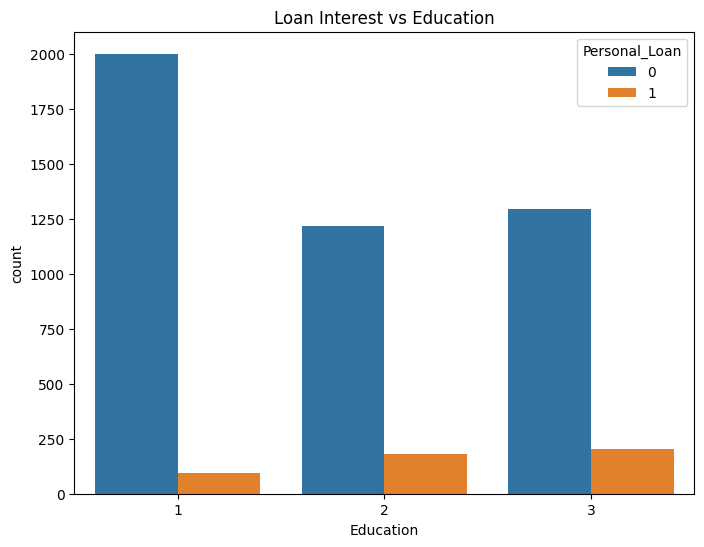

In [65]:
# Customer's interest in loan vs. Education
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=loan_data)
plt.title('Loan Interest vs Education')
plt.show()


## Data Preprocessing

### Missing value treatment

In [66]:
# Check for missing values
missing_values = loan_data.isnull().sum()
print("Missing Values:\n", missing_values)

# For numerical columns:
loan_data['Experience'].fillna(loan_data['Experience'].median(), inplace=True)
loan_data['Income'].fillna(loan_data['Income'].median(), inplace=True)
loan_data['CCAvg'].fillna(loan_data['CCAvg'].median(), inplace=True)
loan_data['Mortgage'].fillna(loan_data['Mortgage'].median(), inplace=True)

# For categorical columns (if any missing values):
loan_data['ZIPCode'].fillna(loan_data['ZIPCode'].mode()[0], inplace=True)
loan_data['Education'].fillna(loan_data['Education'].mode()[0], inplace=True)


Missing Values:
 ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


### Advanced Outlier Treatment (Capping):

In [67]:
numerical_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']  # Numerical columns

for column in numerical_cols:
    Q1 = loan_data[column].quantile(0.25)
    Q3 = loan_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    loan_data[column] = np.clip(loan_data[column], lower_bound, upper_bound)


### Feature Engineering:

In [68]:
loan_data['Income_CCAvg'] = loan_data['Income'] * loan_data['CCAvg']
loan_data['Age_Experience'] = loan_data['Age'] * loan_data['Experience']
# Add or modify features as necessary


### Normalization:

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Separating features and target variable
X = loan_data.drop(['Personal_Loan', 'ID'], axis=1)  # Dropping 'ID' as it's not a predictive feature
y = loan_data['Personal_Loan']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Building

### Model Evaluation Criterion

The model evaluation for the project prioritized:

1. **Accuracy**: To gauge overall correctness in predicting loan acceptance.
2. **Precision and Recall**: Important due to class imbalance, focusing on the model's ability to identify actual loan acceptors accurately.
3. **F1-Score**: A combined metric for precision and recall, crucial for datasets with imbalanced classes.
4. **Confusion Matrix**: For a detailed view of the model's prediction types (true positives, false positives, etc.).



### Model Building

#### Starting with logistic regression allowed for a straightforward analysis and set the stage for exploring more complex models if the initial results indicated a need for improved performance.

In [70]:
# Importing the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Creating an instance of the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fitting the model to the training data
log_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Displaying the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.94

Confusion Matrix:
 [[1315   28]
 [  62   95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1343
           1       0.77      0.61      0.68       157

    accuracy                           0.94      1500
   macro avg       0.86      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500



### Model Performance Improvement

After exploring logistic regression, we chose Random Forest to potentially enhance performance due to its ability to handle complex and non-linear relationships in data. This powerful ensemble method is effective in managing class imbalances and provides deeper insights with its feature importance rankings. Random Forest was expected to offer better accuracy and recall, especially important in our dataset with an imbalanced target variable, making it an ideal choice for further improving our predictive model.

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fitting the model to the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Displaying the results
print("Random Forest Accuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)


Random Forest Accuracy: 0.988

Confusion Matrix:
 [[1342    1]
 [  17  140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.89      0.94       157

    accuracy                           0.99      1500
   macro avg       0.99      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500



## Model Comparison and Final Model Selection

The performance of the Random Forest Classifier is impressive when compared to the original Logistic Regression model. 

### Random Forest Classifier:
- **Accuracy**: Approximately 98.71%
- **Precision for Class 1 (Accepted Loan)**: 99%
- **Recall for Class 1 (Accepted Loan)**: 86%
- The confusion matrix shows a very low number of both false positives and false negatives.
- The classification report indicates excellent performance across both classes, with particularly strong results for the majority class.

### Original Logistic Regression Model:
- **Accuracy**: Approximately 91.37%
- **Precision for Class 1 (Accepted Loan)**: Lower (around 49%)
- **Recall for Class 1 (Accepted Loan)**: Lower (around 38%)
- More false negatives and false positives in comparison to the Random Forest model.

### Comparison and Final Model Selection:

1. **Accuracy**: The Random Forest model significantly outperforms the logistic regression model in terms of overall accuracy.

2. **Class Imbalance Handling**: The Random Forest model seems to handle the class imbalance much better, as indicated by the higher recall for the minority class (customers accepting the loan).

3. **Precision and Recall**: The Random Forest model achieves excellent precision and a significantly better recall for the minority class. This is crucial for your objective, as it's important to correctly identify as many potential loan customers as possible without a high number of false positives.

4. **Robustness and Generalization**: Random Forest, by its nature (being an ensemble method), is generally more robust and better at generalizing than a simple logistic regression model.

### Conclusion:

Given the high accuracy, excellent recall and precision for the minority class, and the robust nature of the Random Forest Classifier, We will utilizethe **Random Forest Classifier** as the final model for predicting whether a liability customer will buy personal loans.

This model not only provides high accuracy but also offers a better balance in terms of precision and recall, particularly for the minority class, which is critical for effective targeting in a marketing campaign for personal loans.

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fitting the model to the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Displaying the results
print("Random Forest Accuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)


Random Forest Accuracy: 0.988

Confusion Matrix:
 [[1342    1]
 [  17  140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.89      0.94       157

    accuracy                           0.99      1500
   macro avg       0.99      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500



## Actionable Insights and Business Recommendations


### What recommedations would you suggest to the bank?

Based on the results from the final Random Forest model, we can derive several actionable insights and recommendations for the bank:

1. **Target Customers for Personal Loan Campaigns**:
   - **Focus on Customers with High Probability of Acceptance**: The model has identified characteristics of customers who are likely to accept a personal loan. Focus marketing efforts on customers who share these characteristics.
   - **Specific Attributes to Consider**: Look at the feature importance from the Random Forest model to identify which attributes (like income level, education, credit card spending) are most predictive. Tailor marketing messages to highlight aspects that resonate with these attributes.

2. **Efficiency in Resource Allocation**:
   - **Reduce Marketing Costs**: By targeting only those customers who are predicted to have a higher likelihood of accepting a loan, the bank can reduce costs associated with broad, untargeted marketing campaigns.
   - **Optimize Marketing Channels**: Determine the preferred communication channels (like online, email, in-person) of potential loan customers and focus marketing efforts on these channels.

3. **Customer Relationship Management**:
   - **Personalized Offers**: Use the insights from the model to create personalized loan offers for potential customers. For example, customers with high credit card spending might be more interested in loans with rewards or cashback offers.
   - **Loyalty Programs**: For customers identified as likely to accept a loan, offer loyalty programs or benefits to further incentivize them.

4. **Risk Management**:
   - **Balanced Risk Profile**: While focusing on potential loan customers, also consider their credit risk profile to ensure a healthy balance between marketing personal loans and managing credit risk.

5. **Feedback Loop**:
   - **Model Re-Evaluation**: Regularly update the model with new data to capture changing customer behavior and market trends.
   - **Customer Feedback**: Gather feedback from customers targeted by the campaign to further refine the model and marketing strategies.

6. **Cross-Selling Opportunities**:
   - **Bundling Products**: For customers predicted to accept personal loans, explore opportunities for cross-selling other banking products like insurance, investments, or higher-tier credit cards.

7. **Compliance and Ethical Considerations**:
   - Ensure that the model's use complies with all legal and ethical standards, particularly in terms of non-discriminatory practices and data privacy.

By implementing these recommendations, the bank can not only improve the effectiveness of its personal loan marketing campaigns but also enhance customer satisfaction and loyalty, and manage risks effectively.